# Amazon Web Scraper

### Import Libraries

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Input Link

In [30]:
amazonpage = 'https://www.amazon.co.uk/Avoid-Huge-Ships-John-Trimmer/dp/0870334336'

In [31]:
header={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'} #provide header for webscraper

#Get the contents of the reviews page
Link = []
page=requests.get(amazonpage,headers=header) #https://github.com/vijeshs/Web-Scraping-/blob/master/Web%20Scraping-JBL%20speaker.ipynb
soup=BeautifulSoup(page.content) #prepare it for beautiful soup
for i in soup.findAll('a',attrs={'data-hook':'see-all-reviews-link-foot'}): #get the link which shows all reviews (this is more interesting if you need lots of links - will be used)
    Link.append(i['href'])

### Establish lists

In [32]:
reviewsselect = []
ratingsselect = []
reviewersselect = []
titlesselect = []
datesselect = []

### Scrape web

In [33]:
for k in range(len(Link)):                              #helps to iterate for different products which we aren't doing in this case
    for i in range(1,15):                               #each product , it scrapes 15 pages of reviews
        cont_response=requests.get('https://www.amazon.co.uk'+Link[k]+'sortBy=recent&pageNumber='+str(i), headers=header)   #iterates through multiple pages of the reviews
        soup=BeautifulSoup(cont_response.content)                                #save review body to list
        for z in soup.select('span[data-hook*="review-body"]'):#pull out the information from speific elements using these attributes
            reviewsselect.append(z.get_text())
        for y in soup.select('i[data-hook*="review-star-rating"]')[2:13]:#pull out the information from speific elements using these attributes
            ratingsselect.append(y.get_text())
        for x in soup.select('span[class*="a-profile-name"]')[2:13]:#pull out the information from speific elements using these attributes
            reviewersselect.append(x.get_text()) 
        for w in soup.select('a[data-hook*="review-title"]'):#pull out the information from speific elements using these attributes
            titlesselect.append(w.get_text()) 
        for v in soup.select('span[class*="a-size-base a-color-secondary review-date"]')[2:13]:#pull out the information from speific elements using these attributes
            datesselect.append(v.get_text())

            

### Crop some international reviews

In [34]:
reviews = reviewsselect[0:len(titlesselect)]
reviewers = reviewersselect[0:len(titlesselect)]
ratings = ratingsselect[0:len(titlesselect)]
titles = titlesselect
dates = datesselect[0:len(titlesselect)]

### Tidy up some of the data

In [35]:
for i in range(len(reviewers)):
    if reviewers[i][-1] == ' ':
        reviewers[i] = reviewers[i][:-1] #remove extra spaces at the end of usernames

In [36]:
for i in range(len(ratings)):
    ratings[i] = ratings[i][0] #turn review rating into int

### create dataframe of all amazon reviews

In [37]:
AmazonReviews=pd.DataFrame(columns=['Review']) #initialise dataframe
AmazonReviews['Review']=reviews #fill reviews column
AmazonReviews['rating']=ratings #fill ratings column
AmazonReviews['Reviewer'] = reviewers #fill reviewers columns
AmazonReviews['Title'] = titles #fill reviewers columns
AmazonReviews['Dates'] = dates

In [38]:
AmazonReviews

,Review,rating,Reviewer,Title,Dates
0,"\n\n As the father of two teenagers, I found ...",5,Justin,\nA must-read\n,Reviewed in the United Kingdom on 2 January 2018
1,"\n\n Finally! The Second Edition is here, and...",5,VoodooMike,\nA vast improvement\n,Reviewed in the United Kingdom on 23 November ...
2,"\n\n As an iceberg, I read this with a tear i...",5,Mr. J. Scott,\nEssential tips for the Grand Banks\n,Reviewed in the United Kingdom on 12 August 2015
3,\n\n Before I read this book I couldn't walk ...,5,Philip Sadler,\nThis book saved my balls!\n,Reviewed in the United Kingdom on 29 April 2017
4,"\n\n I opened this book, hoping for some good...",1,BestAmazonReviews,\nWorks but not what I expected\n,Reviewed in the United Kingdom on 21 January 2017
...,...,...,...,...,...
117,\n\n I've been plagued by huge ships all my l...,5,Shalva Shine,\nAt last! A book that can help me!\n,Reviewed in the United Kingdom on 30 March 2008
118,\n\n The title is wrong - replace the P with ...,1,Run Grover Run,\nthe title is wrong\n,Reviewed in the United Kingdom on 10 June 2014
119,"\n\n Trimmer's book is deceptively simple, ta...",5,Gordon Hawk,\nStern Theory\n,Reviewed in the United Kingdom on 8 May 2008
120,\n\n I too was plagued by Huge Ship issues in...,4,Audioduck,\nGood introduction but lacking detail.\n,Reviewed in the United Kingdom on 27 March 2009


## Turn review info back into images

In [39]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

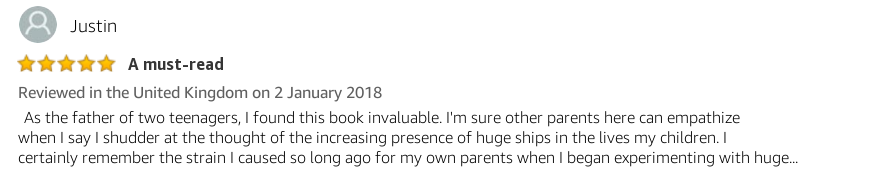

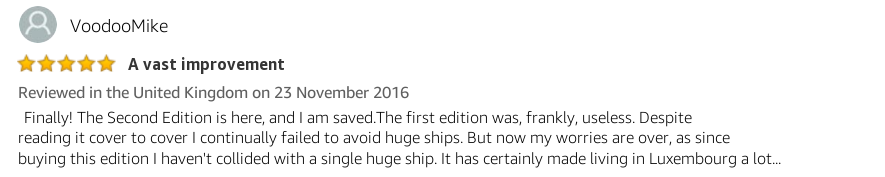

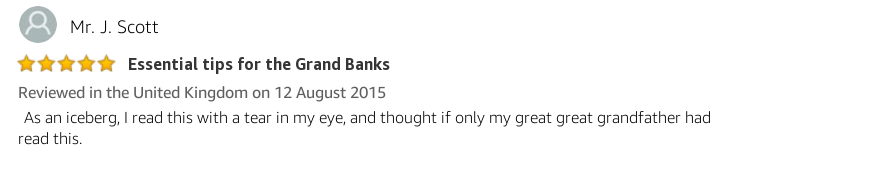

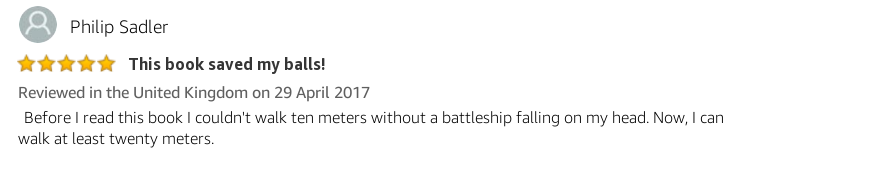

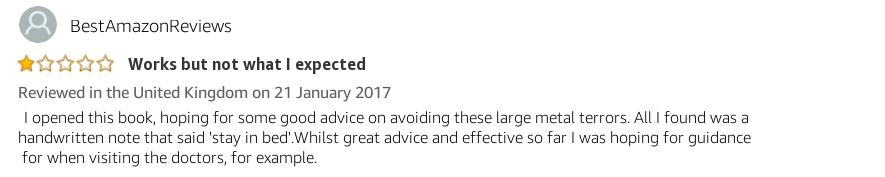

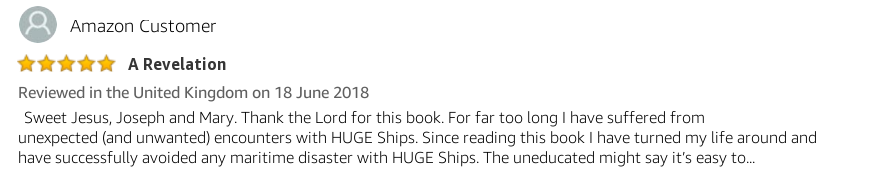

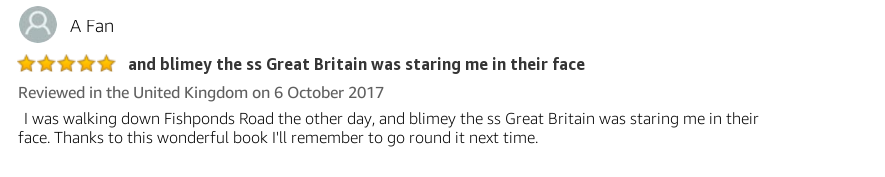

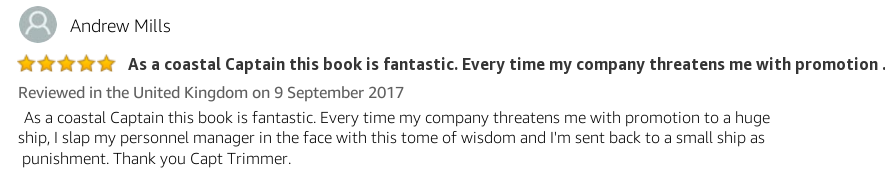

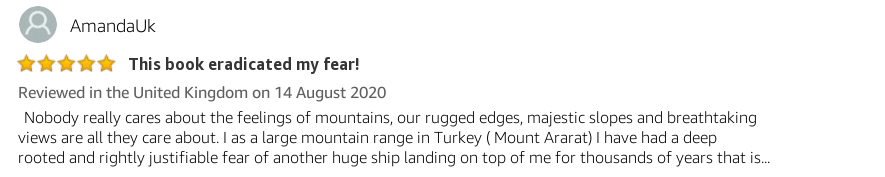

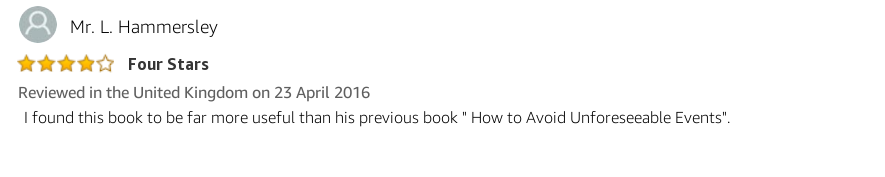

In [40]:


# get star image
Review = Image.open('Am Rachel.png')

area = (16, 54, 36, 72)

Star = Review.crop(area)

Review.paste(Star, (114, 54)) 

star3 = Image.open('Am Charlene.png')
area = (91,57,111,78)
EmptyStar = star3.crop(area)
EmptyStar

for i in range(0,10,1):
    #open blank amazon review image
    img = Image.open("Amrev Blank.png")
    draw = ImageDraw.Draw(img) # rename draw command
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype("AmazonEmber_LT.ttf", 16) #instantiate amazon ember font
    # draw.text((x, y),"Sample Text",(r,g,b))
    
    Content = AmazonReviews['Review'][i]
    Line1 = ""
    Line2 = ""
    Line3 = ""
    if len(Content) > 108:
        for j in range(0,20,1):
            if Content[108-j] == " ":
                EOL1 = 108-j
                Line1 = Content[0:EOL1]
                break
        if len(Content) > 216:
            for k in range(0,20,1):
                if Content[216-k] == " ":
                    EOL2 = 216-k
                    Line2 = Content[EOL1+1:EOL2]
                    break
            if len(Content) > 324:
                for m in range(0,20,1):
                    if Content[324-m] == " ":
                        EOL3 = 324-m
                        Line3 = Content[EOL2+1:EOL3]+str("...")
                        break
            else: Line3 = Content[EOL2:len(Content)]
        else: 
            Line2 = Content[EOL1+1:len(Content)]
            Line3 = " "
    else: 
        Line1 = Content[0:len(Content)]
        Line2 = " "
        Line3 = " "
        
    draw.text((16,68), Line1,(0,0,0),font=font)
    draw.text((18,128), Line2,(0,0,0),font=font)
    draw.text((18,148), Line3,(0,0,0),font=font)
    
    rating = int(AmazonReviews['rating'][i])
    for n in range(rating):
        img.paste(Star, (16+n*20, 54)) 
    for p in range(5-rating):
        img.paste(EmptyStar, (94-p*20, 52))
    draw.text((116+12,34), AmazonReviews['Title'][i],(53,53,53),font=ImageFont.truetype("Amazon Ember Bold.ttf", 16))
    draw.text((18,82), AmazonReviews['Dates'][i],(95,95,95),font=ImageFont.truetype("AmazonEmber_RG.ttf", 16))
    draw.text((70,15), AmazonReviews['Reviewer'][i], (0,0,0), font=ImageFont.truetype("AmazonEmber_LT.ttf",18))
    display(img)